# Assignment 4.1

# Part a 

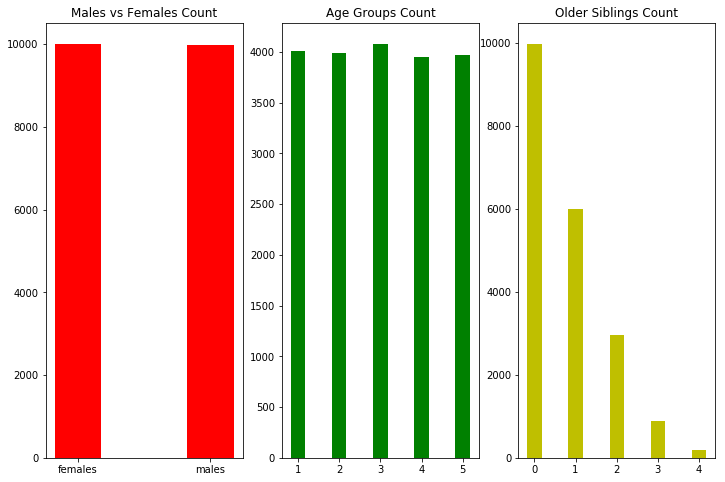

In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

df = pd.read_csv("vaccination.csv")

### Point a ###

gender = df['gender']
age_groups = df['age']
older_siblings = df['olderSiblings']

np_gender = gender.values
np_age_groups = age_groups.values
np_older_siblings = older_siblings.values

c_gender=collections.Counter(np_gender)
gender_count = c_gender.values()


c_age_group=collections.Counter(np_age_groups)
age_group_count = c_age_group.values()

c_older_siblings = collections.Counter(np_older_siblings)
older_siblings_count = c_older_siblings.values()

ind_gender = np.arange(2)
ind_age = np.arange(5)
ind_older_siblings = np.arange(5)

width = 0.35 # the width of the bars

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(12,8)
rects1 = ax1.bar(ind_gender, gender_count, width, color='r')

ax1.set_xticks(ind_gender)
ax1.set_xticklabels(('females', 'males'))
ax1.set_title('Males vs Females Count')

rects2 = ax2.bar(ind_age, age_group_count, width, color='g')
ax2.set_xticks(ind_age)
ax2.set_xticklabels(('1', '2', '3', '4', '5'))
ax2.set_title('Age Groups Count')

rects3 = ax3.bar(ind_older_siblings, older_siblings_count, width, color='y')
ax3.set_xticks(ind_older_siblings)
ax3.set_xticklabels(('0', '1', '2', '3', '4'))
ax3.set_title('Older Siblings Count')

plt.show()

# Part b

In [5]:

P_have_vacc_x = df[df['vacX'] == 1]['vacX'].count()
total_vacX = df['vacX'].count()
print("Prob to have vaccination against disease X =", P_have_vacc_x/total_vacX)

P_countryside = df[df['residence'] == 1]['residence'].count()
total_residence = df['residence'].count()
print("Prob to live in country side =", P_countryside/total_residence)

P_have_at_least_one_sibling = df[df['olderSiblings'] != 0]['olderSiblings'].count()
total_siblings = df['olderSiblings'].count()
print("Prob to have at least one sibling =", P_have_at_least_one_sibling/total_siblings)


Prob to have vaccination against disease X = 0.93735
Prob to live in country side = 0.25245
Prob to have at least one sibling = 0.50125


# Part c

In [6]:

P_taller_1_meter = df[df['height'] > 100]['height'].count()
total_height = df['height'].count()
print("Prob taller than 1 meter =", P_taller_1_meter/total_height)

P_heavier_40_kg = df[df['weight'] > 40]['weight'].count()
total_weight = df['weight'].count()
print("Prob heavier than 40 kg =", P_heavier_40_kg/total_weight)

Prob taller than 1 meter = 0.77705
Prob heavier than 40 kg = 0.4013


# Part d

P(diseaseX|vacX=0/1) = 0.00335
P(vacX|diseaseX=0/1) = 0.00335
P(diseaseY|age=1/2/3/4) = 0.114216206101
P(vacX|age=1/2/3/4) = 0.923211278149
P(knowsToRideABike|vacX=0/1) = 0.63555


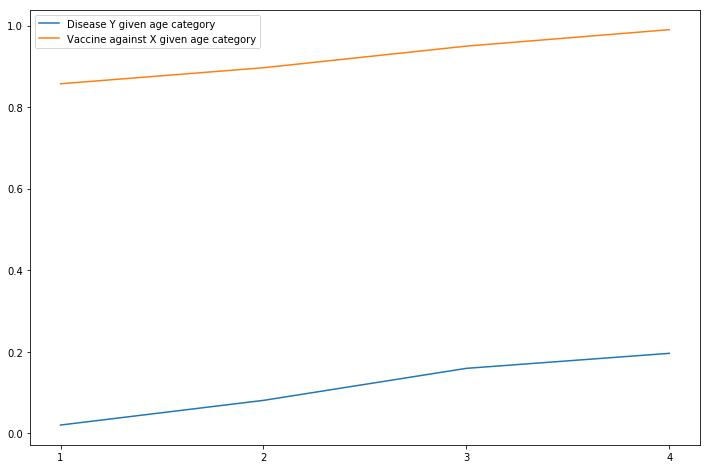

In [7]:

print("P(diseaseX|vacX=0/1) =", df.query('diseaseX == 1 and (vacX == 0 or vacX == 1)')['vacX'].count()/df.query('vacX == 0 or vacX == 1')['vacX'].count())
print("P(vacX|diseaseX=0/1) =", df.query('diseaseX == 1 and (vacX == 0 or vacX == 1)')['diseaseX'].count()/df.query('diseaseX == 0 or diseaseX == 1')['diseaseX'].count())

print("P(diseaseY|age=1/2/3/4) =", df.query('diseaseY ==  1 and age != 5')['age'].count()/df.query('age != 5')['age'].count())
print("P(vacX|age=1/2/3/4) =", df.query('vacX == 1 and age != 5')['age'].count()/df.query('age != 5')['age'].count())
print("P(knowsToRideABike|vacX=0/1) =", df.query('knowsToRideABike == 1 and (vacX == 0 or vacX == 1)')['vacX'].count()/df.query('vacX == 0 or vacX == 1')['vacX'].count())

x = np.arange(4)
y = [] # will hold diseaseY|age=a
z = [] # will hold vacX|age=a
for a in [1,2,3,4]:
    y.append(df.query('diseaseY ==  1 and age == %s' % a)['age'].count()/df.query('age == %s' % a)['age'].count())
    z.append(df.query('vacX == 1 and age == %s' % a)['age'].count()/df.query('age == %s' % a)['age'].count())


fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(12,8)


ax1.set_xticks(x)
ax1.set_xticklabels(('1', '2', '3', '4'))
diseaseY_line, = ax1.plot(x,y)
vacX_line, = ax1.plot(x,z)
ax1.legend([diseaseY_line, vacX_line], ['Disease Y given age category', 'Vaccine against X given age category'])
plt.show()

# Part e 

P(diseaseYZ|vacX=0/1) 0.2429
P(diseaseYZ|vacX=0/1, age=1/2/3/4) 0.206599713056


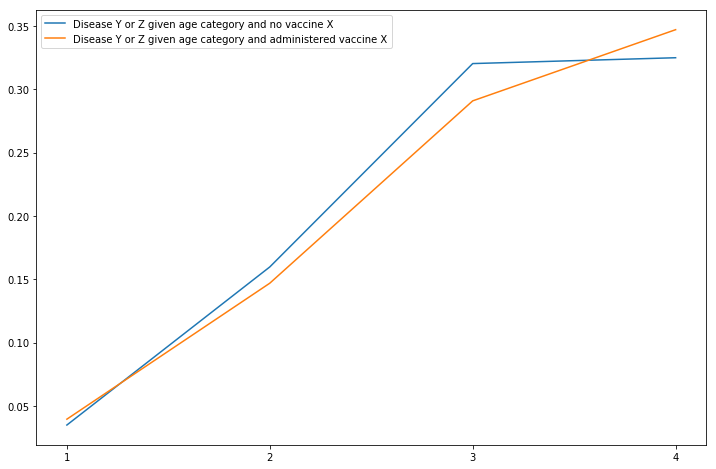

In [8]:

p1 = df.query('(diseaseY == 1 or diseaseZ == 1) and (vacX == 0 or vacX == 1)')['vacX'].count()/df.query('vacX == 0 or vacX == 1')['vacX'].count()
print("P(diseaseYZ|vacX=0/1)", p1) # = 0.24 compared to P(diseaseX|vacX=0/1) = 0.00335
p2 = df.query('(diseaseY == 1 or diseaseZ == 1) and (vacX == 0 or vacX == 1) and (age != 5)')['vacX'].count()/df.query('(vacX == 0 or vacX == 1) and (age != 5)')['vacX'].count()
print("P(diseaseYZ|vacX=0/1, age=1/2/3/4)", p2)

x = np.arange(4)
y = []
z = []
for a in [1,2,3,4]:
    y.append(df.query('(diseaseY == 1 or diseaseZ == 1) and (vacX == 0) and (age == %s)' % a)['age'].count()/df.query('(vacX == 0) and (age == %s)' % a)['age'].count())
    z.append(df.query('(diseaseY == 1 or diseaseZ == 1) and (vacX == 1) and (age == %s)' % a)['age'].count()/df.query('(vacX == 1) and (age == %s)' % a)['age'].count())

fig, ax1 = plt.subplots(1,1)
fig.set_size_inches(12,8)

ax1.set_xticks(x)
ax1.set_xticklabels(('1', '2', '3', '4'))
diseaseYZ_firstline, = ax1.plot(x,y)
diseaseYZ_secondline, = ax1.plot(x,z)
ax1.legend([diseaseYZ_firstline, diseaseYZ_secondline], ['Disease Y or Z given age category and no vaccine X', 'Disease Y or Z given age category and administered vaccine X'])
plt.show()